## study multilabel stratification function 

study https://stackoverflow.com/questions/53378970/how-to-perform-multilabel-stratified-sampling

In [1]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
import numpy as np 
# define dataset
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])

(100, 10) (100, 3)
[ 3.  3.  6.  7.  8.  2. 11. 11.  1.  3.] [1 1 0]
[7. 6. 4. 4. 6. 8. 3. 4. 6. 4.] [0 0 0]
[ 5.  5. 13.  7.  6.  3.  6. 11.  4.  2.] [1 1 0]
[1. 1. 5. 5. 7. 3. 4. 6. 4. 4.] [1 1 1]
[ 4.  2.  3. 13.  7.  2.  4. 12.  1.  7.] [0 1 0]
[ 4.  3.  3.  2.  5.  2.  3.  7.  2. 10.] [0 0 0]
[ 3.  3.  3. 11.  6.  3.  4. 14.  1.  3.] [0 1 0]
[ 2.  1.  7.  8.  4.  5. 10.  4.  6.  6.] [1 1 1]
[ 5.  1.  9.  5.  3.  4. 11.  8.  1.  8.] [1 1 1]
[ 2. 11.  7.  6.  2.  2.  9. 11.  9.  3.] [1 1 1]


In [2]:
from skmultilearn.model_selection import iterative_train_test_split
x_train, y_train, x_test, y_test = iterative_train_test_split(X, y, test_size = 0.2)

In [3]:
sorted({2,7,3})

[2, 3, 7]

In [4]:
#def calc_prop(arr):
#    return arr.sum(axis=0)/arr.shape[0]
#
#def calc_prop_change(arr, base_arr):
#    thing = (calc_prop(arr)-calc_prop(base_arr))/calc_prop(base_arr)
#    #return np.array([round(thing_i,5) for thing_i in thing])
#    return thing


def calc_prop(arr, set_thing = None ):
    #set_thing : optional input 
    aggregate = []

    if set_thing == None  : 
        if type(arr) == np.ndarray : 
            set_thing = set(arr.flatten())
        else : 
            set_thing = set(arr)
    else : 
        set_thing = set_thing
    for i in set_thing:
        aggregate.append(np.count_nonzero(arr == i, axis=0))
    return np.array(aggregate)/arr.shape[0]


def calc_prop_change(arr, base_arr, set_thing = None):
    thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
    return thing

In [5]:
##base proportions
100*calc_prop(y)

array([[35., 36., 77.],
       [65., 64., 23.]])

In [6]:
##y-wise difference
100*calc_prop_change(y_train,y), 100*calc_prop_change(y_test,y) #percentage wise

(array([[  0.        ,   0.69444444,   5.51948052],
        [  0.        ,  -0.390625  , -18.47826087]]),
 array([[  0.        ,  -2.77777778, -22.07792208],
        [  0.        ,   1.5625    ,  73.91304348]]))

In [7]:
##can see that division was well done, and the proportions was somewhat well preserved for all the three categories
#however, NOT cross validation (only one split)

# Cross validaiton using multilabel 
* http://scikit.ml/concepts.html#The-multi-label-data-representation, http://scikit.ml/stratification.html

look at this! (iterative stratification) : http://scikit.ml/api/skmultilearn.model_selection.iterative_stratification.html#module-skmultilearn.model_selection.iterative_stratification => this seems to be the kfold versio nthingie


* X : (n_samples, n_features) (dense ones like np arrays are possible)
* y : (n_samples, n_labels)
    * **the labels in y shouldn't be mmore than binary class!** (see below)
> y is expected to be a binary integer indicator matrix of shape. In the binary indicator matrix each matrix element A[i,j] should be either 1 if label j is assigned to an object no i, and 0 if not.
    * therefore, stratified 할때 binary 해야함!
        * **sklearn은 binary/multiclass 다되는데.... 이거는 안되나?**

## 2.1. now doing iterative stratification
(http://scikit.ml/api/skmultilearn.model_selection.iterative_stratification.html#module-skmultilearn.model_selection.iterative_stratification) 



In [8]:
from skmultilearn.model_selection import IterativeStratification
k_fold = IterativeStratification(n_splits=5, order=1) #on't increae the order (i think)(if > 1, does with replacement)
print(100*calc_prop(y))

total_val_set = set()

for train,test in k_fold.split(X,y):
    x_train,y_train = X[train], y[train]
    x_test,y_test = X[test], y[test]
    print("\n===y_train, y_test percentage deviations from y (%)===")
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
    print(100*calc_prop_change(y_train,y))
    print(100*calc_prop_change(y_test,y))
    #print(calc_prop_change(train,X))
    
    total_val_set = total_val_set.union(train)


[[35. 36. 77.]
 [65. 64. 23.]]

===y_train, y_test percentage deviations from y (%)===
(80, 10) (80, 3) (20, 10) (20, 3)
[[ 0.          0.69444444  2.27272727]
 [ 0.         -0.390625   -7.60869565]]
[[ 0.         -2.77777778 -9.09090909]
 [ 0.          1.5625     30.43478261]]

===y_train, y_test percentage deviations from y (%)===
(80, 10) (80, 3) (20, 10) (20, 3)
[[ 0.         -2.77777778  0.64935065]
 [ 0.          1.5625     -2.17391304]]
[[ 0.         11.11111111 -2.5974026 ]
 [ 0.         -6.25        8.69565217]]

===y_train, y_test percentage deviations from y (%)===
(80, 10) (80, 3) (20, 10) (20, 3)
[[ 0.          0.69444444  0.64935065]
 [ 0.         -0.390625   -2.17391304]]
[[ 0.         -2.77777778 -2.5974026 ]
 [ 0.          1.5625      8.69565217]]

===y_train, y_test percentage deviations from y (%)===
(80, 10) (80, 3) (20, 10) (20, 3)
[[ 0.          0.69444444 -2.5974026 ]
 [ 0.         -0.390625    8.69565217]]
[[  0.          -2.77777778  10.38961039]
 [  0.        

In [9]:
len(total_val_set) #as expected => i.e. didn't reuse the things, but CV was actually well done 

100

## NOW HAVE TO CHECK IF multiclass + multilabel works!(i.e. try multiclass)

In [10]:
#y_multiclass (modifing)
y_multiclass = y.copy()
y_multiclass[::10,0] = 2 #changing the first labels to 2 (multiclass) every 5 things
#y_multiclass[::11,0] = 3 #changing the first labels to 2 (multiclass) every 5 things

In [11]:
y_multiclass

array([[2, 1, 0],
       [0, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [2, 1, 0],
       [1, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 0],
       [2, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [2, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [2, 1, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [0, 0, 0],
       [2, 1, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 1, 0],
       [0,

In [12]:
from skmultilearn.model_selection import IterativeStratification
k_fold = IterativeStratification(n_splits=5, order = 1) #on't increae the order (i think)(if > 1, does with replacement)
print("below : the shapes of (class_i, n_labels)")
print(100*calc_prop(y_multiclass))

total_val_set = set()

for train,test in k_fold.split(X,y_multiclass):
    x_train,y_train = X[train], y_multiclass[train]
    x_test,y_test = X[test], y_multiclass[test]
    #print(x_train.shape, x_test.shape)

    print("\n===y_train, y_test percentage deviations from y (%)===")
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    print(100*calc_prop_change(y_train,y_multiclass))
    print(100*calc_prop_change(y_test,y_multiclass))
    #print(calc_prop_change(train,X))
    
    total_val_set = total_val_set.union(train)

below : the shapes of (class_i, n_labels)
[[33. 36. 77.]
 [57. 64. 23.]
 [10.  0.  0.]]

===y_train, y_test percentage deviations from y (%)===
(80, 10) (20, 10) (80, 3) (20, 3)
[[ 2.27272727  0.69444444  0.64935065]
 [-1.31578947 -0.390625   -2.17391304]
 [ 0.                 nan         nan]]
[[-9.09090909 -2.77777778 -2.5974026 ]
 [ 5.26315789  1.5625      8.69565217]
 [ 0.                 nan         nan]]

===y_train, y_test percentage deviations from y (%)===
(80, 10) (20, 10) (80, 3) (20, 3)
[[-1.51515152  0.69444444 -0.97402597]
 [-3.50877193 -0.390625    3.26086957]
 [25.                 nan         nan]]


/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)


ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

# 보듯이, https://github.com/scikit-multilearn/scikit-multilearn/issues/132
> multiclass + multilabel은 잘 안되는 것 같다!

https://github.com/trent-b/iterative-stratification/issues/27#issue-1577817136

일단 위에 두개보고, 되는지 안되는지 확인해보자 => 안된다면.. 흠.. 어떻게 하지? 
(그리고 어차피, age같은 것은 하지도 못할거같은데..?)(unless artificially splitting into age brackets and treating age as a categorical thing)

=> 이것 보고 하기!


# 3. ABCD 에 실제 적용해서 하기 

## 3.1. ABCD config에서 가져오기


In [13]:
import sys 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
label_csv = '/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/csv/ABCD_csv/ABCD_phenotype_total_ONLY_MRI.csv'

In [14]:
from sklearn.model_selection import StratifiedKFold, KFold
import pandas as pd 

labels = pd.read_csv(label_csv)

label_name = "sex"
labels = labels[labels[label_name].notna()] #이파트를 더 추가해야할듯 (if doing stuff)
labels = labels[labels['married'].notna()] #이파트를 더 추가해야할듯 (if doing stuff)
labels = labels[labels["Conduct.Disorder.x"].notna()]



#labels[label_name] = labels[label_name].astype('str') #regressino하려면 이파트를 바꿔야할듯 #no need to force str? 
#
#task_include = ['1.0','2.0']
#data_1 = labels[labels[label_name] == task_include[0]]
#data_2 = labels[labels[label_name] == task_include[1]]
#data_1 = data_1[:50]
#data_2 = data_2[:50]
#
#label_tv = pd.concat([data_1, data_2])
label_tv = labels[:100]
label_tv.sample(frac = 1)


col2view = ['sex','married'] #'', race.ethnicity

##default thing 
#[i for i in label_tv.keys()]



## 3.2. default stratification 하기 (single label)

['sex', 'married']
[[0.54 0.76]
 [0.46 0.  ]
 [0.   0.05]
 [0.   0.05]
 [0.   0.07]
 [0.   0.07]]
===FOLD : 0===
with training
[[ 0.01851852  0.03618421]
 [-0.02173913         nan]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan -0.10714286]
 [        nan -0.28571429]]
with validation
[[-0.07407407 -0.14473684]
 [ 0.08695652         nan]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.42857143]
 [        nan  1.14285714]]
===FOLD : 1===
with training
[[-0.00462963 -0.01315789]
 [ 0.00543478         nan]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan  0.07142857]
 [        nan  0.07142857]]
with validation
[[ 0.01851852  0.05263158]
 [-0.02173913         nan]
 [        nan  0.        ]
 [        nan  0.        ]
 [        nan -0.28571429]
 [        nan -0.28571429]]
===FOLD : 2===
with training
[[-0.00462963 -0.02960526]
 [ 0.00543478         nan]
 [        nan  0.        ]
 [        nan  0.25      ]
 [        nan -0.107142

/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27:

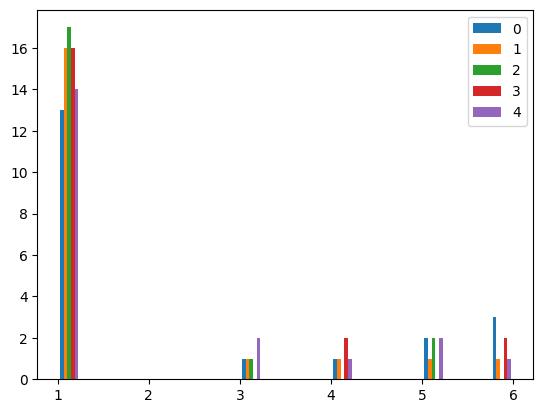

In [15]:
### 1. only one thing (StratifiedKFold)
kf = StratifiedKFold(n_splits=5)
##first, get the things

#print(calc_prop(label_tv[['sex','married']].values))
print(col2view)
print(calc_prop(label_tv[col2view].values))
set_thing = set(label_tv[col2view].values.flatten()) #un split된 상태에서의 set을 써야함


thing = []
for FOLD, (train_idx, valid_idx) in enumerate(kf.split(label_tv, label_tv[label_name])): 
    print(f"===FOLD : {FOLD}===")
    train = label_tv.iloc[train_idx]
    valid = label_tv.iloc[valid_idx]

    print("with training")
    print(calc_prop_change(train[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    #print(calc_prop(train[col2view].values)) 
    
    print("with validation")
    print(calc_prop_change(valid[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    #print(calc_prop(valid[col2view].values)) 
    #plt.hist(valid['married'], density=True, alpha = 0.5,label=FOLD)
    thing.append(valid['married'])
plt.hist(thing,bins = 20, label = [i for i in range(5)])
plt.legend()
plt.show()

In [16]:
#import matplotlib.pyplot as plt 
#plt.hist(valid['married'], bins = 20,density=True)

#[i for i in set_thing]
#train[['sex','married']].values

print(label_tv['SLEEP.PROBLEMS.x'].values)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0.]


In [17]:
for i in label_tv:
    print(i, end = " : ")
    print(len(set(label_tv[i].values)), end = " | " )
    print((label_tv[i].sum()))

Unnamed: 0 : 100 | 5079
SubjectID : 100 | NDARINV003RTV85NDARINV007W6H7BNDARINV00BD7VDCNDARINV00CY2MDMNDARINV00HEV6HBNDARINV00LH735YNDARINV00LJVZK2NDARINV00NPMHNDNDARINV00R4TXETNDARINV00U4FTRUNDARINV00UMK5VCNDARINV00X2TBWJNDARINV010ZM3H9NDARINV014RTM1VNDARINV0182J779NDARINV0191C80UNDARINV019DXLU4NDARINV01AJ15N9NDARINV01D03VR7NDARINV01ELX9L6NDARINV01EN91PGNDARINV01NAYMZHNDARINV01RGTWD2NDARINV01TXCDJNNDARINV01Z8HAPVNDARINV021403LFNDARINV021N0FLHNDARINV022ZVCT8NDARINV028D3ELLNDARINV028WCTG6NDARINV029PWCFYNDARINV02EBX0JJNDARINV02H7G2T6NDARINV02JXJUZGNDARINV02RCED7DNDARINV02UVMTY7NDARINV02WP3TP6NDARINV030W95VPNDARINV030X9ZNHNDARINV0314RN9PNDARINV0387TP8RNDARINV03BDCNWMNDARINV03CV8RDTNDARINV03KMHMJJNDARINV03NW0RKLNDARINV03XVEBPMNDARINV03YU08FANDARINV040B4TRCNDARINV042UJKFBNDARINV04BFG4JMNDARINV04CLBZADNDARINV04EUBGTMNDARINV04GAB2AANDARINV04JY6730NDARINV04P0G6LKNDARINV04R9REGFNDARINV04TRXUGLNDARINV04YC4RXDNDARINV052HU3CUNDARINV056V9RRJNDARINV059VLAHFNDARINV05ATJ1V1NDARINV05CA3VX5NDARINV05LGG3

## 3.3. doing multilabel thing 
* did order = 2!! (much better) (maybe increase the ordeR?)

['sex', 'SLEEP.PROBLEMS.x', 'Conduct.Disorder.x', 'Unspecified.Bipolar.and.Related.Disorder.x']
[[0.   0.75 0.95 0.89]
 [0.54 0.25 0.05 0.11]
 [0.46 0.   0.   0.  ]]
===FOLD : 0===
with training
[[        nan  0.          0.          0.01123596]
 [ 0.01851852  0.          0.         -0.09090909]
 [-0.02173913         nan         nan         nan]]
with validation
[[        nan  0.          0.         -0.04494382]
 [-0.07407407  0.          0.          0.36363636]
 [ 0.08695652         nan         nan         nan]]
===FOLD : 1===
with training
[[        nan  0.          0.         -0.00280899]
 [-0.05092593  0.          0.          0.02272727]
 [ 0.05978261         nan         nan         nan]]
with validation
[[        nan  0.          0.          0.01123596]
 [ 0.2037037   0.          0.         -0.09090909]
 [-0.23913043         nan         nan         nan]]
===FOLD : 2===
with training
[[        nan  0.          0.         -0.00280899]
 [ 0.08796296  0.          0.          0.0227272

/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27: RuntimeWarning: invalid value encountered in divide
  thing = (calc_prop(arr, set_thing)-calc_prop(base_arr,set_thing))/calc_prop(base_arr, set_thing)
/tmp/ipykernel_1984956/4080913144.py:27:

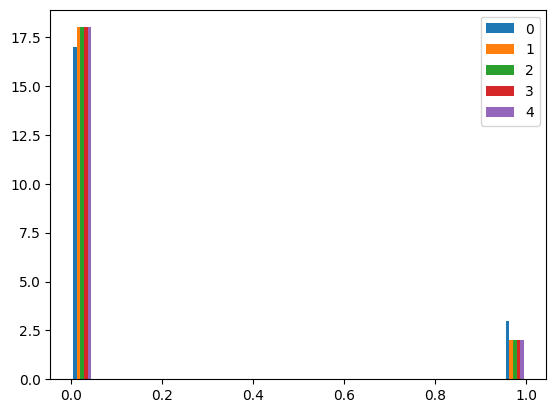

[3. 2. 2. 2. 2.]
0.019999999999999997


In [243]:
### 1. multilabel classification (
from skmultilearn.model_selection import IterativeStratification
kf = StratifiedKFold(n_splits=5)
ikf = IterativeStratification(n_splits=5, order=2, random_state= np.random.seed(seed = 1)) #on't increae the order (i think)(if > 1, does with replacement)

#below doesn't work because it won't work (not changed yet)
#for FOLD, (train_idx, valid_idx) in enumerate(kf.split(label_tv, label_tv[label_name])): 
#col2view = ['sex','SLEEP.PROBLEMS.x']
#col2view = ['sex', 'Conduct.Disorder.x']
col2view = ['sex','SLEEP.PROBLEMS.x','Conduct.Disorder.x','Unspecified.Bipolar.and.Related.Disorder.x']
print(col2view)
print(calc_prop(label_tv[col2view].values))




floatized_arr = np.array(label_tv[col2view].values, dtype = float)
set_thing = set(label_tv[col2view].values.flatten()) #un split된 상태에서의 set을 써야함
thing = []

#single label
#for FOLD, (train_idx, valid_idx) in enumerate(kf.split(label_tv, label_tv[label_name])): 
#multilabel
for FOLD, (train_idx, valid_idx) in enumerate(ikf.split(floatized_arr, floatized_arr)): 
    print(f"===FOLD : {FOLD}===")
    train = label_tv.iloc[train_idx]
    valid = label_tv.iloc[valid_idx]

    print("with training")
    print(calc_prop_change(train[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    #print(calc_prop(train[col2view].values)) 
    
    print("with validation")
    print(calc_prop_change(valid[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    #print(calc_prop(valid[col2view].values)) 
    #plt.hist(valid['married'], density=True, alpha = 0.5,label=FOLD)
    thing.append(valid[col2view[-1]])
plt.hist(thing,bins = 20, label = [i for i in range(5)])
plt.legend()
plt.show()
print(np.array(thing).sum(axis = 1))
print(np.array(thing).mean(axis = 1).std())

In [216]:
floatized_arr

array([[2., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [2., 1., 0., 0.],
       [2., 0., 0., 1.],
       [2., 1., 0., 1.],
       [2., 0., 0., 0.],
       [2., 1., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [2., 1., 0., 0.],
       [1., 0., 0., 0.],
       [2., 1., 0., 0.],
       [1., 0., 0., 0.],
       [2., 0., 0., 0.],
       [2., 1., 0., 1.],
       [2., 0., 0., 0.],
       [1., 0., 0., 0.],
       [2., 0., 0., 0.],
       [2., 1., 0., 0.],
       [2., 0., 0., 0.],
       [1., 0., 0., 0.],
       [2., 0., 0., 0.],
       [2., 0., 0., 0.],
       [2., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [2., 0., 0., 0.],
       [2., 0., 0., 0.],
       [1., 0., 0., 0.],
       [2., 1., 0., 0.],
       [1., 1., 0., 0.],
       [2., 0., 0., 0.],
       [2., 0., 0., 0.],
       [1., 0., 0., 0.],


## 3.4. Now doing multiclass + multilabel

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
df_col = label_tv[['race.ethnicity']]#column 으로 df 를 추려낸 것 
#has to be [[]] not [] because we need to use 2D array


ohe = OneHotEncoder()  #default : sparse True
ohe.fit(df_col) 

OneHotEncoder()

In [21]:
#print(ohe.transform(valid[['married']])) #change to dense

[array([1., 2., 3., 4., 5.])]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.

(array([63.,  0., 10.,  0.,  0., 14.,  0.,  2.,  0., 11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

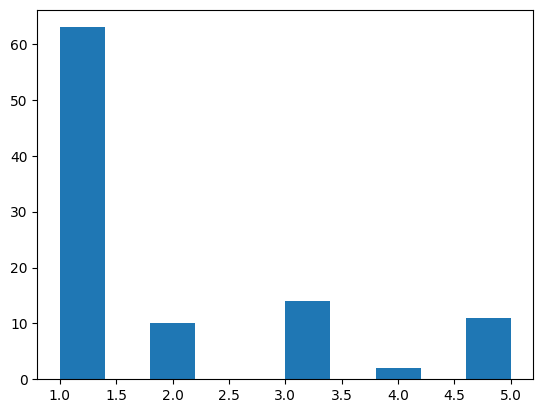

In [22]:
print(ohe.categories_)
print(ohe.transform(df_col).todense())
plt.hist(df_col)

In [209]:
##single (final_df)로 하기 

final_df = ohe.transform(df_col).todense()
final_df.sum(axis=0)

col2view = ['race.ethnicity']
set_thing = set(label_tv[col2view].values.flatten()) #un split된 상태에서의 set을 써야함
for FOLD, (train_idx, valid_idx) in enumerate(ikf.split(final_df, final_df)): 
    print(f"===FOLD : {FOLD}===")
    train = label_tv.iloc[train_idx]
    valid = label_tv.iloc[valid_idx]

    print("with training")
    print(calc_prop_change(train[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    #print(calc_prop(train[col2view].values)) 
    
    print("with validation")
    print(calc_prop_change(valid[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    
##밑에 multilabel_matrix_maker를 정의해서 쓸것이기에 일단은 비워둠

===FOLD : 0===
with training
[[ 0.00462126]
 [ 0.01265823]
 [-0.00542495]
 [-0.36708861]
 [ 0.03567319]]
with validation
[[-0.01738473]
 [-0.04761905]
 [ 0.02040816]
 [ 1.38095238]
 [-0.13419913]]
===FOLD : 1===
with training
[[-0.01277584]
 [-0.02439024]
 [ 0.04529617]
 [ 0.2195122 ]
 [-0.00221729]]
with validation
[[ 0.05820106]
 [ 0.11111111]
 [-0.20634921]
 [-1.        ]
 [ 0.01010101]]
===FOLD : 2===
with training
[[-0.00793651]
 [ 0.        ]
 [-0.01785714]
 [ 0.25      ]
 [ 0.02272727]]
with validation
[[ 0.03174603]
 [ 0.        ]
 [ 0.07142857]
 [-1.        ]
 [-0.09090909]]
===FOLD : 3===
with training
[[ 0.00462126]
 [ 0.01265823]
 [-0.00542495]
 [ 0.26582278]
 [-0.07940161]]
with validation
[[-0.01738473]
 [-0.04761905]
 [ 0.02040816]
 [-1.        ]
 [ 0.2987013 ]]
===FOLD : 4===
with training
[[ 0.01190476]
 [ 0.        ]
 [-0.01785714]
 [-0.375     ]
 [ 0.02272727]]
with validation
[[-0.04761905]
 [ 0.        ]
 [ 0.07142857]
 [ 1.5       ]
 [-0.09090909]]


In [211]:
final_df.shape

(100, 5)

## 3.5. Now doing regression thing 

(array([10., 33., 26., 18.,  3.,  5.,  2.,  1.,  0.,  2.]),
 array([ 42.75 ,  58.075,  73.4  ,  88.725, 104.05 , 119.375, 134.7  ,
        150.025, 165.35 , 180.675, 196.   ]),
 <BarContainer object of 10 artists>)

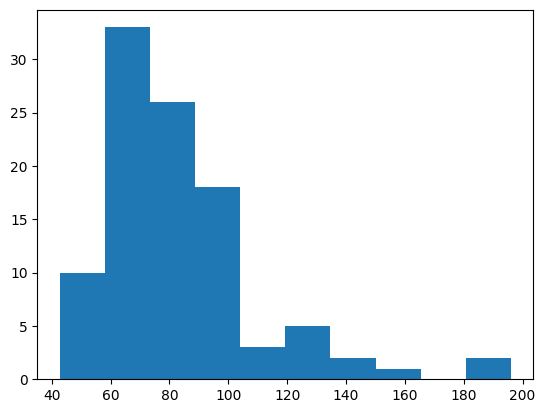

In [54]:
plt.hist(label_tv["weight"])

In [176]:
from sklearn.preprocessing import OneHotEncoder

#get the boundaries to use to split into chunks with increasing value 
def slice_index(array, n_chunks ):
    partitioned_list = np.array_split(np.sort(array), n_chunks)
    return [i[-1] for i in partitioned_list]
    

def multilabel_matrix_maker(df, binary_cols = None, multiclass_cols = None , contiuous_cols = None , n_chunks = None) :
    """
    returns matrix that will be used for multilabel, taking into account columns that are either multiclass or continuous
    * df : the dataframe to be split
    * binary_cols : LIST of cols (str)just cols that will be used (binarized)
    * multiclass_cols : LIST of the cols (str) that are multi class
    * continuous_cols : LIST of the cols (str) that will be split (continouous)
    * n_chunks : if using continouous cols are used, how many split?
    
    outputs matrix that has binarized binarized for all columns (only needs to be used during iskf to get the indices)
    """
    
    
    if binary_cols == multiclass_cols == contiuous_cols == None : #i.e. if all are None
        raise ValueError("at least one of the cols have to be put.. currently all cols are selected as None")
    
    #now adding binarized columns for each column types and aggregating them into total_cols
    total_cols = []
    if binary_cols : 
        for col in binary_cols :
            print(col)
            total_cols.append(df[col].values) #or single []?  ([[]] : df 로 만드는 것, [] : series로 만듬) 
            
    if multiclass_cols :
        for col in multiclass_cols : 
            df_col = df[[col]] #[[]] not [] because of dims 
            ohe = OneHotEncoder()
            ohe.fit(df_col)
            binarized_col = ohe.transform(df_col).todense() 
            total_cols.append(binarized_col)

    if contiuous_cols : 
        if not n_chunks : 
            raise ValueError("n_chunks must be provided when runing continouous cols")
        else : 
            for col in contiuous_cols:
                array = df[col].values
                boundaries = slice_index(array, n_chunks)  
                i_below = -np.infty
                for i in boundaries:
                    extracted_df = (df[col]>i_below) & (df[col]<=i) 
                    i_below = i #update i_below
                    
                    total_cols.append(extracted_df.values.astype(float))     
    
    #adding all together, and doing some sanity check before returning the final thing 
    final_arr = np.column_stack(total_cols)
    if np.isnan(final_arr).any():
        raise ValueError("at least one of the leemnts of the final array is NaN. most likely your provided df had some NaN in columns that you are wanting to do iskf on")
    
    return final_arr
    
    
    
    
    

In [171]:
aa = multilabel_matrix_maker(label_tv,binary_cols= ['sex'], contiuous_cols=['age', 'BMI'], n_chunks=3)

sex


['sex', 'SLEEP.PROBLEMS.x', 'Conduct.Disorder.x', 'Unspecified.Bipolar.and.Related.Disorder.x', 'BMI']
sex
===FOLD : 0===
===FOLD : 1===
===FOLD : 2===
===FOLD : 3===
===FOLD : 4===


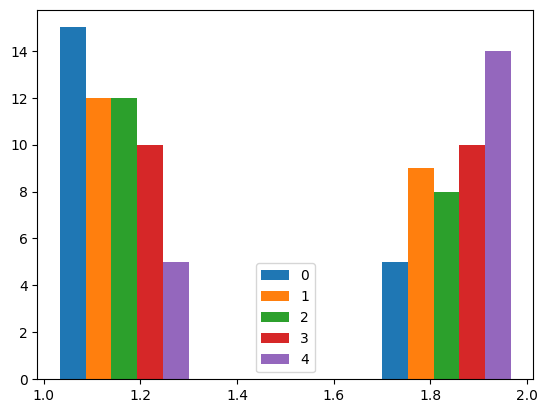

[25.0, 30.0, 28.0, 30.0, 33.0]
[0.4442616583193193, 0.5070925528371101, 0.5026246899500346, 0.512989176042577, 0.4524139283588641]


In [300]:
DEBUG = False
from skmultilearn.model_selection import IterativeStratification
kf = StratifiedKFold(n_splits=5)
ikf = IterativeStratification(n_splits=5, order=2, random_state=np.random.seed(seed = 1)) #on't increae the order (i think)(if > 1, does with replacement)

#col2view = ['sex','SLEEP.PROBLEMS.x']
#col2view = ['sex', 'Conduct.Disorder.x']
col2view = ['sex','SLEEP.PROBLEMS.x','Conduct.Disorder.x','Unspecified.Bipolar.and.Related.Disorder.x']
#col2view = ['sex', 'race.ethnicity'] #'BMI',

col2view = ['sex','SLEEP.PROBLEMS.x','Conduct.Disorder.x','Unspecified.Bipolar.and.Related.Disorder.x', 'BMI']

##config에서 넣어줄때, 종류를 미리 나눠서 ㄴ허어줘야할듯 
print(col2view)
print(calc_prop(label_tv[col2view].values)) if DEBUG else None


#floatized_arr = np.array(label_tv[col2view].values, dtype = float)
floatized_arr = multilabel_matrix_maker(label_tv,binary_cols= ['sex'], 
                                        #multiclass_cols=['Conduct.Disorder.x'])
                                        multiclass_cols=['SLEEP.PROBLEMS.x','Conduct.Disorder.x','Unspecified.Bipolar.and.Related.Disorder.x'],
                                       contiuous_cols=['BMI'], n_chunks=3)#, contiuous_cols=['age', 'BMI'], n_chunks=)


set_thing = set(label_tv[col2view].values.flatten()) #un split된 상태에서의 set을 써야함
thing = []

#single label
#for FOLD, (train_idx, valid_idx) in enumerate(kf.split(label_tv, label_tv[label_name])): 
#multilabel
for FOLD, (train_idx, valid_idx) in enumerate(ikf.split(floatized_arr, floatized_arr)): 
    print(f"===FOLD : {FOLD}===")
    train = label_tv.iloc[train_idx]
    valid = label_tv.iloc[valid_idx]

    if DEBUG : 
        print("with training")
        print(calc_prop_change(train[col2view].values, label_tv[col2view].values, set_thing = set_thing))
        
        print("with validation")
        print(calc_prop_change(valid[col2view].values, label_tv[col2view].values, set_thing = set_thing))
    thing.append(valid[col2view[0]])
plt.hist(thing,bins = 3, label = [i for i in range(5)])
plt.legend()
plt.show()


##sometimes, the validation set might not have the same size, even if it can become like that  (so, for loop으로 통계계산)
print([i.sum() for i in thing])
print([i.std() for i in thing])


In [298]:
valid[col2view]

,sex,SLEEP.PROBLEMS.x,Conduct.Disorder.x,Unspecified.Bipolar.and.Related.Disorder.x,BMI
0,2.0,0.0,0.0,0.0,20.480539
9,2.0,0.0,0.0,1.0,15.429355
15,2.0,1.0,0.0,0.0,17.840192
19,2.0,0.0,0.0,0.0,22.070175
23,2.0,0.0,0.0,0.0,14.782389
24,2.0,1.0,0.0,0.0,27.160571
28,2.0,0.0,0.0,0.0,16.140306
39,2.0,0.0,0.0,0.0,23.562006
42,2.0,0.0,0.0,0.0,17.594969
49,2.0,1.0,0.0,0.0,18.822212


In [146]:
100//3

33

In [117]:
round(100/5)

20

In [172]:
def slice_index(array, n_chunks ):
    partitioned_list = np.array_split(np.sort(array), n_chunks)
    return [i[-1] for i in partitioned_list]

col = 'BMI'
n_chunks = 3
array = label_tv[col].values
#boundaries = np.sort(array)[::-10] #10개씩 자른다고 할때

boundaries = slice_index(array, n_chunks)
print(boundaries)

total_df = []
i_below = -np.infty
for i in boundaries:
    print(i_below, i)
    labels = (label_tv[col]>i_below) & (label_tv[col]<=i) 
    i_below = i 
    
    total_df.append(labels)
    
    print(labels.values.sum())
    

    
    
    
#not all chunks will have equal size, because in the case of age, multiple subjects have the same age, so dividing it doesn't work that well


[16.32979962, 19.10771358, 35.09129664]
-inf 16.32979962
34
16.32979962 19.10771358
33
19.10771358 35.09129664
33


In [164]:
labels.values.astype(float)

array([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.])

In [151]:
split_chunk(label_tv[col].values, 3)

[array([108., 108., 108., 109., 109., 109., 109., 109., 109., 109., 109.,
        109., 109., 109., 110., 110., 110., 111., 111., 111., 111., 111.,
        111., 112., 112., 112., 113., 114., 114., 114., 114., 115., 115.,
        115.]),
 array([116., 116., 116., 116., 117., 117., 118., 118., 118., 119., 119.,
        119., 119., 119., 119., 120., 120., 120., 121., 122., 122., 122.,
        122., 122., 122., 123., 123., 123., 123., 123., 123., 123., 123.]),
 array([124., 125., 125., 126., 126., 126., 126., 126., 126., 126., 127.,
        127., 127., 128., 128., 128., 128., 128., 128., 129., 130., 130.,
        130., 130., 130., 130., 131., 131., 131., 131., 131., 131., 131.])]

In [150]:
[i[-1] for i in split_chunk(label_tv[col].values, 3)]

[115.0, 123.0, 131.0]

In [155]:
slice_index(label_tv[col].values, 3)

[115.0, 123.0, 131.0]

In [ ]:
col = 'age'
n_chunks = 3
array = label_tv[col].values
#boundaries = np.sort(array)[::-10] #10개씩 자른다고 할때

boundaries = np.sort(array)[::-int(len(array)/n_chunks)] #10개씩 자른다고 할때
print(boundaries)

total_df = []
i_below = -np.infty
for i in reversed(boundaries):
    print(i_below, i)
    labels = (label_tv[col]>i_below) & (label_tv[col]<=i) 
    i_below = i 
    
    total_df.append(labels)
    
    print(labels.values.sum())
    
#not all chunks will have equal size, because in the case of age, multiple subjects have the same age, so dividing it doesn't work that well



In [134]:
np.sort(label_tv['age'].values)

array([108., 108., 108., 109., 109., 109., 109., 109., 109., 109., 109.,
       109., 109., 109., 110., 110., 110., 111., 111., 111., 111., 111.,
       111., 112., 112., 112., 113., 114., 114., 114., 114., 115., 115.,
       115., 116., 116., 116., 116., 117., 117., 118., 118., 118., 119.,
       119., 119., 119., 119., 119., 120., 120., 120., 121., 122., 122.,
       122., 122., 122., 122., 123., 123., 123., 123., 123., 123., 123.,
       123., 124., 125., 125., 126., 126., 126., 126., 126., 126., 126.,
       127., 127., 127., 128., 128., 128., 128., 128., 128., 129., 130.,
       130., 130., 130., 130., 130., 131., 131., 131., 131., 131., 131.,
       131.])

In [50]:
final_df.sum(axis = 0)

matrix([[63., 10., 14.,  2., 11.]])

In [53]:
multilabel_matrix_maker(label_tv, binary_cols=["sex"],multiclass_cols= ["race.ethnicity"]).sum(axis=0)

#multilabel_matrix_maker(label_tv,multiclass_cols= ["race.ethnicity"]).sum(axis=0)


sex


matrix([[146.,  63.,  10.,  14.,   2.,  11.]])

In [ ]:
label_tv["Conduct.Disorder.x"].values

In [ ]:
label_tv[col2view]

In [ ]:
for train,test in k_fold.split(X,y_multiclass):
    x_train,y_train = X[train], y_multiclass[train]
    x_test,y_test = X[test], y_multiclass[test]
    #print(x_train.shape, x_test.shape)
    
#이거보고하기!

In [ ]:
float_thing = np.array(label_tv[['sex','married']].values, dtype = float)
for train_idx, valid_idx in kf.split(np.arange(len(label_tv)), float_thing): 
    print(train_idx)

In [ ]:
for i, (train,test) in enumerate(k_fold.split(np.arange(len(y)),y)):
    #X is meaningless so just ignore 
    #x_train,y_train = X[train], y[train]
    #x_test,y_test = X[test], y[test]
    
    print(y[train].shape, y[test].shape)


In [ ]:
X.shape

In [ ]:
len(y)

In [ ]:
np.array(label_tv[["sex", "married"]].values, dtype = float)

In [ ]:
train_idx

In [ ]:
label_tv[label_name]

In [ ]:
np.max(train[label_name])

In [ ]:
set(train[label_name])

In [ ]:
aggregate = []
arr = train[label_name]
for i in set(train[label_name]):
    aggregate.append(np.count_nonzero(arr == i, axis=0))
print(np.array(aggregate)/arr.shape[0])

In [ ]:
aaaa #meant to interrupt it 

In [ ]:
small_y = y_multiclass[:5]
print(np.count_nonzero(small_y == 0, axis = 0),
np.count_nonzero(small_y == 1, axis = 0),
np.count_nonzero(small_y == 2, axis = 0))




In [ ]:
small_y

In [ ]:
100*calc_prop(y)

In [ ]:
np.max(small_y)

In [ ]:
def calc_prop_multiclass(arr):
    aggregate = []
    for i in range(np.max(arr)+1):
        aggregate.append(np.count_nonzero(arr == i, axis=0))
    return np.array(aggregate)/arr.shape[0]



def calc_prop_change_multiclass(arr, base_arr):
    thing = (calc_prop_multiclass(arr)-calc_prop_multiclass(base_arr))/calc_prop_multiclass(base_arr)
    return thing

In [ ]:
calc_prop_multiclass(y_multiclass)

In [ ]:
calc_prop_change_multiclass(y_multiclass[:8],y_multiclass)

In [ ]:
y_multiclass[:10]

In [ ]:
y_multiclass

### past stuff (sparse X, y 쓸대인데... 그냥 일반적인 dense 써도 되어서 아놤)

In [ ]:
from skmultilearn.dataset import load_dataset
X, y, _, _ = load_dataset('emotions', 'train')

In [ ]:
##looking at data
print(X.shape, y.shape)


for i, y_i in enumerate(y):
    print(f"===the {i}th target is===")
    print(y_i)
    if i == 5:
        break
#here, y is sparse (hence where the sparse thing came from)